In [ ]:
# Langgraph chatbot without the memory functinality
# Author: Muhammad Humayun Khan

from langgraph.graph import StateGraph, START, END
from langchain_openai import ChatOpenAI
from typing import TypedDict,Annotated
from langchain_core.messages import BaseMessage,HumanMessage
from langgraph.graph.message import add_messages
from dotenv import load_dotenv


In [16]:
# create the ChatState class
class ChatState(TypedDict):
    messages = Annotated[list[BaseMessage],add_messages]

In [17]:
# Load key and model
load_dotenv()
model = ChatOpenAI()

In [21]:
# create associated function with the chatbot_node
def chatbot_node_func(state:ChatState):
    messages = state['messages']        # user query
    response = model.invoke(messages)   # llm response

    return {'messages':[response]}  # response will be stored


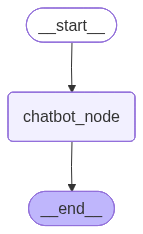

In [22]:
# create the graph
graph = StateGraph(ChatState)

# create the node
graph.add_node('chatbot_node',chatbot_node_func)

# create the edges
graph.add_edge(START,'chatbot_node')
graph.add_edge('chatbot_node',END)

graph_result = graph.compile()
graph_result

In [25]:
# chat until the user wants to stop
while True:
    user_message = input("Type your Message")
    print("Human Message: ",user_message)

    if user_message.strip().lower() in ['quit','exit']:
        break

    chatbot_response = model.invoke([HumanMessage(content = user_message)])

    print('AI response: ',chatbot_response.content)

Human Message:  hello
AI response:  Hello! How can I assist you today?
Human Message:  i am feeling great now
AI response:  That's wonderful to hear! Keep up the positivity and enjoy the good feelings. If there's anything I can do to help make your day even better, just let me know.
Human Message:  exit
